In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('food_coded.csv')
df.keys()

df.head()

df.describe()

df.dtypes

dft = df.loc[:,['GPA','Gender','breakfast','calories_day','cook','diet_current_coded','drink','eating_out',
                'employment','exercise','income','marital_status','sports','vitamins',
                'on_off_campus','pay_meal_out','veggies_day']]

dft.head()

dft = dft.apply(pd.to_numeric,errors='coerce')

dft = dft.fillna(dft.mean)

dft.isna().sum().sum()

dft.dtypes

import seaborn as sns
sns.boxplot(data=dft[['income','GPA']])

In [235]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

X = np.array(dft[['income','GPA']].values)

kmeans = KMeans(n_clusters=cluster_size, init='k-means++', max_iter=500, n_init=10, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)
dft["clusters"]=labels

wcss = []
maxsize = 11
for cluster_size in range(1,maxsize):
    kmeans = KMeans(n_clusters=cluster_size, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,maxsize),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

optimal = 4
kmeans = KMeans(n_clusters=optimal, init='k-means++', max_iter=500, n_init=125, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='pink', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.show()

In [273]:
import requests
def get(distance):
    coord = set()
    url = "https://api.foursquare.com/v3/places/search?ll=28.6347%2C77.3046&radius="+str(distance)+"&categories=12094&limit=50"
    headers = {
        "accept": "application/json",
        "Authorization": "[redacted]"
    }
    response = requests.request("GET",url, headers=headers)
    resp = response.json()
    for x in resp['results'] :
        #temp['lat'].append(x['geocodes']['main']['latitude'])
        #temp['lon'].append(x['geocodes']['main']['longitude'])
        coord.add((x['geocodes']['main']['latitude'],x['geocodes']['main']['longitude'],x['name']))
    return coord

In [274]:
final = set()
for distance in range(1000,21000,1000):
    final = final.union(get(distance))    
resd = dict()
resd['name'] = []
resd['lat'] = []
resd['lon'] = []
for (x,y,name) in final :
    resd['lat'].append(x)
    resd['lon'].append(y)
    resd['name'].append(name)
tdf = pd.DataFrame.from_dict(resd)
tdf.to_csv('ResidentialAreas.csv',index=0)
print("Residential Areas Marked")

Done


In [295]:
req_cat = {'Restaurant':13065,'Fruit and Vegetable':17067,'Grocery Store':17069,
           'Health and Medicine':15000,'Sweets and Snacks':13210,'Metro Station':19046}

def get_cat(x,y,category):
    url = "https://api.foursquare.com/v3/places/search?ll="+str(x)+"%2C"+str(y)+"&radius=1000&categories="+str(category)+"&limit=50"
    headers = {
        "accept": "application/json",
        "Authorization": "[redacted]"
    }
    response = requests.request("GET",url,headers=headers)
    resp = response.json()
    return len(resp['results'])

In [296]:
%%time
from time import sleep
import os
from IPython.display import display, clear_output
resd_cnt = dict()
resd_cnt['lat'] = tdf['lat']
resd_cnt['lon'] = tdf['lon']
for name in req_cat.keys():
    tmp = []
    for (x,y) in zip(tdf['lat'],tdf['lon']):
        tmp.append(get_cat(x,y,req_cat[name]))
        print("Processing",name,"for",x,y)
        clear_output(wait=True)
        sleep(2)
    resd_cnt[name]=tmp
rdf = pd.DataFrame.from_dict(resd_cnt)
rdf.to_csv("ResidentialAreasNeighbourhood.csv",index=0)
print("Neighbourhood of Each Residential Building Marked")

Neighbourhood of Each Residential Building Marked
CPU times: user 19.3 s, sys: 2.55 s, total: 21.9 s
Wall time: 3h 6min 22s


In [297]:
rdf.head()

,lat,lon,Restaurant,Fruit and Vegetable,Grocery Store,Health and Medicine,Sweets and Snacks,Metro Station
0,28.614908,77.337476,50,0,2,45,0,0
1,28.651353,77.297012,50,0,2,50,0,0
2,28.544250,77.370442,50,0,0,13,0,0
3,28.611455,77.295179,50,0,4,50,0,0
4,28.630080,77.434880,50,0,7,25,0,0


In [299]:
for i in range(len(resd_cnt['Fruit and Vegetable'])):
    resd_cnt['Grocery Store'][i]+=resd_cnt['Fruit and Vegetable'][i]
del resd_cnt['Fruit and Vegetable']
rdf = pd.DataFrame.from_dict(resd_cnt)
rdf.to_csv("ResidentialAreasNeighbourhood.csv",index=0)
print("Neighbourhood of Each Residential Building Marked")

Neighbourhood of Each Residential Building Marked


In [300]:
X = np.array(rdf[['Restaurant','Grocery Store','Health and Medicine']])

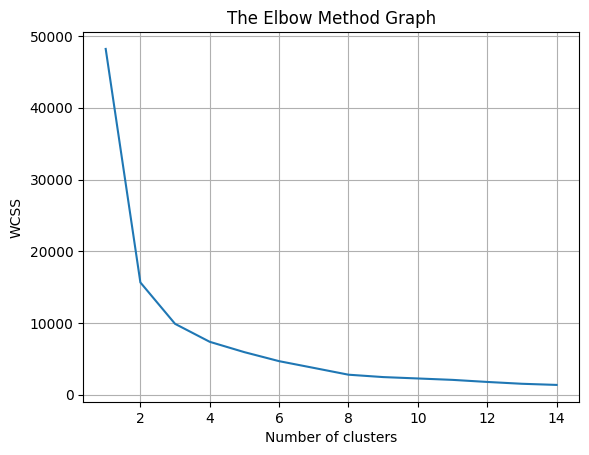

In [303]:
wcss = []
maxsize = 15
for cluster_size in range(1,maxsize):
    kmeans = KMeans(n_clusters=cluster_size, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,maxsize),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [311]:
optimal = 3
kmeans = KMeans(n_clusters=optimal, init='k-means++', max_iter=500, n_init=125, random_state=0)
y_kmeans = kmeans.fit_predict(X)
rdf['cluster']=y_kmeans

In [314]:
data1 = rdf[rdf.cluster==0]
data2 = rdf[rdf.cluster==1]
data3 = rdf[rdf.cluster==2]

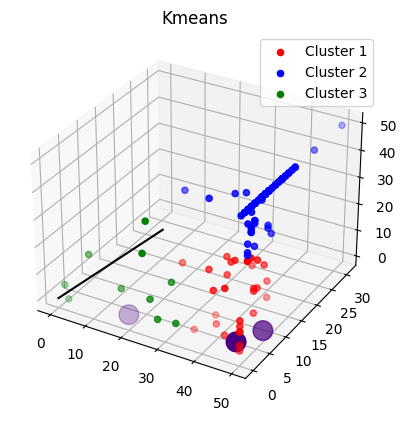

In [318]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.Restaurant, data1['Grocery Store'], data1['Health and Medicine'], c='red', label = 'Cluster 1')
kplot.scatter3D(data2.Restaurant, data2['Grocery Store'], data2['Health and Medicine'], c='blue', label = 'Cluster 2')
kplot.scatter3D(data3.Restaurant, data3['Grocery Store'], data3['Health and Medicine'], c='green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()

In [321]:
import folium
this_map = folium.Map(prefer_canvas=True)
latlon = [(x,y) for x,y in zip(rdf['lat'],rdf['lon'])]
for coord in latlon:
    folium.CircleMarker(location=[coord[0], coord[1]],
                        radius=2,
                        weight=5).add_to(this_map)
this_map.fit_bounds(this_map.get_bounds())
this_map